---
title: Modulations
date: 2025-02-02
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

In the previous two lectures, we studied two crucial interferometers: the Fabry-Perot and Michelson.\
From these basic building blocks, we will eventually build the complex interferometer which is Advanced LIGO.\

However, before we build Advanced LIGO, we need a little more technology.\
This tech will revolve around *different frequencies* of light interacting with our interferometers.\
We have already touched on the idea of multiple frequencies at several moments, 
but now we will formalize it in the form of Scattering Matrices, Transfer Functions, and Modulations.

# Modulations
The modulation picture emphasizes the different frequencies of light that are created by different interactions.
GWs are detected as infinitesimal modulations applied to highly stabilized laser light.
Noise in the laser light, whether quantum or classical, is modulations not caused by GWs.

A perfectly noiseless electric field $E$ is known as the *carrier*:
\begin{align}
    \label{eq:noiseless_carrier}
    E = E_0 e^{i \omega_0 t}
\end{align}
where $\omega_0$ is the carrier frequency, 
$E_0$ is the carrier amplitude,
and $t$ is time.

## Phase Modulation
A *phase modulation* of amplitude $\delta \phi$ at frequency $\omega$ can be applied to the carrier light:
\begin{align}
    \label{eq:phase_modulation}
    \nonumber E_{\delta \phi} &= E_0 e^{i \phi} \\
    E_{\delta \phi} &= E_0 e^{i (\omega_0 t + \delta \phi \cos(\omega t)) }
\end{align}

This can be thought of as splitting the carrier power, which is always a sine wave at $\omega_0$,
off into *sidebands* at frequencies $\omega_0 \pm \omega$.
Using the Jacobi-Anger expansion on Eq.~[](#eq:phase_modulation) yields:
\begin{align}
    \label{eq:phase_modulation_jacobi_anger}
    E_{\delta \phi} &= E_0 e^{i \omega_0 t} \displaystyle \sum_{n=-\infty}^{\infty} i^n J_n(\delta \phi) \exp(i n \omega t)
\end{align}
where $J_n$ is the $n^{th}$ Bessel function of the first kind.

If we assume $\delta \phi$ is small, then we can ignore the higher-order sidebands $n \geq 2$,
and write Eq.~[](#eq:phase_modulation_jacobi_anger) as
\begin{align}
    \label{eq:phase_modulation_jacobi_anger_low_order}
    E_{\delta \phi} &= E_0 e^{i \omega_0 t} \left[ J_0(\delta \phi) + i J_1(\delta \phi) e^{i \omega t} - i J_{-1}(\delta \phi) e^{-i \omega t } \right] 
\end{align}

Finally, using $J_{-1}(\delta \phi) = -J_1(\delta \phi)$, 
$J_0(\delta \phi) \approx 1$, 
and $J_1(\delta \phi) \approx \delta \phi / 2$,
we write the final phase modulation in terms of the carrier $\omega_0$, upper sideband $\omega_0 + \omega$ and lower sideband $\omega_0 - \omega$:
\begin{align}
    \label{eq:phase_modulation_final}
    E_{\delta \phi}   &= E_0 e^{i \omega_0 t} \left( 1 + i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} + i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t} \right)\\
    E_{\delta \phi}   &= E_0 e^{i \omega_0 t} \left( 1 + i \delta \phi \cos(\omega t) \right)
\end{align}

The key observation of Eq.~[](#eq:phase_modulation_final) is the relative phase of the sidebands compared with the carrier.\
The sidebands are aligned with one another when they are *orthogonal* to the carrier.\
Calculating the power in the field, 
\begin{align}
    \label{eq:phase_modulation_power}
    \nonumber P_{\delta \phi} &= |E_{\delta \phi}|^2 \\
    \nonumber &= |E_0|^2 \left(1 + \dfrac{(\delta \phi)^2}{2} + \dfrac{(\delta \phi)^2}{4} \left( e^{i 2 \omega t} + e^{-i 2 \omega t} \right) \right) \\
    P_{\delta \phi} &\approx |E_0|^2.
\end{align}
The sidebands push and pull the phase of the carrier by $\delta \phi$, 
but to first order do not alter the amplitude.
Figure [](#fig:phase_modulation) illustrates the sideband and quadrature picture of phase modulation.

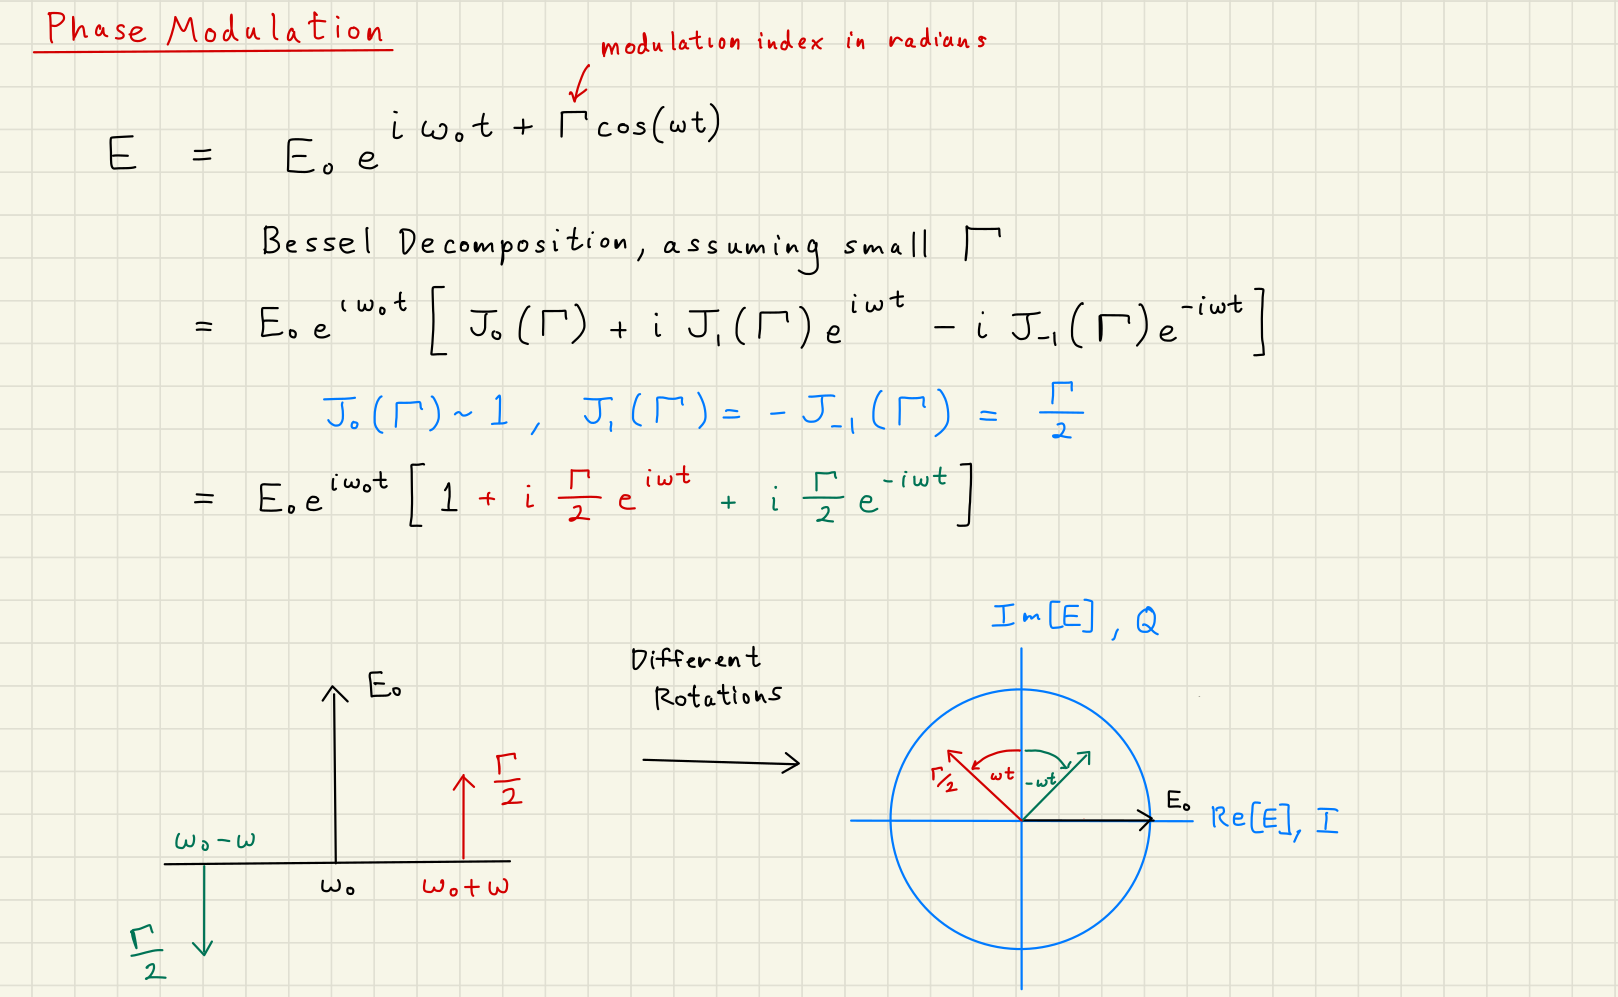

Phase Modulation Scheme

```{exercise}
:label: phase-mod-exercise

Prove to yourself the phase modulated power Equation [](#eq:phase_modulation_power), starting with Eq. [](#eq:phase_modulation_final).

If you kept Bessel function expansion terms to second order instead of first order, $J_0(\Gamma) = 1 - \dfrac{\Gamma^2}{4}$, in Eq. [](#eq:phase_modulation_final)\
how does this influence the our power conservation?
```

```{solution} phase-mod-exercise
:label: phase-mod-exercise-solution
:class: dropdown

With three terms in the input electric field, multiplied by three terms of the complex conjugate,\
we end up with nine total terms in the power expression, which simplifies down to Equation [](#eq:phase_modulation_power):
\begin{align}
\label{eq:phase_mod_exercise}
P_{\delta \phi} &= |E_{\delta \phi}|^2\\
P_{\delta \phi} &= \left[ E_0 e^{i \omega_0 t} \left( 1 + i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} + i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t} \right) \right] 
\left[ E_0 e^{-i \omega_0 t} \left( 1 - i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t} - i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} \right) \right] \\
P_{\delta \phi} &= |E_0|^2 \left[ 
1 + \dfrac{(\delta \phi)^2}{4} + \dfrac{(\delta \phi)^2}{4}
- i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t} - i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} 
+ i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} + i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t}
+ \dfrac{(\delta \phi)^2}{4} e^{i 2 \omega t} + \dfrac{(\delta \phi)^2}{4} e^{-i 2 \omega t} 
\right]\\
P_{\delta \phi} &= |E_0|^2 \left(1 + \dfrac{(\delta \phi)^2}{2} + \dfrac{(\delta \phi)^2}{4} \left( e^{i 2 \omega t} + e^{-i 2 \omega t} \right) \right)
\end{align}
Note we still have our $2\omega$ power oscillation here.

Adding in the second order terms in $J_0 = 1 - \dfrac{\Gamma^2}{4}$ helps us avoid "adding power" to final term, but does not completely eliminate our issue.
\begin{align}
E_{\delta \phi} &= E_0 e^{i \omega_0 t} \left( \left(1 - \dfrac{(\delta \phi)^2}{4} \right) + i \dfrac{\delta \phi}{2} E_0 e^{i \omega t} + i \dfrac{\delta \phi}{2} E_0 e^{-i \omega t} \right) \\
\rightarrow P_{\delta \phi} &= |E_0|^2 \left(1 + \dfrac{(\delta \phi)^4}{16} + \dfrac{(\delta \phi)^2}{4} \left( e^{i 2 \omega t} + e^{-i 2 \omega t} \right) \right)
\end{align}
Integrating the right hand side over one period of the $2\omega$ oscillation eliminates the exponetial terms, yielding 
\begin{align}
\dfrac{1}{2\pi} \int_0^{2\pi} P_{\delta \phi} d(2 \omega t) = |E_0|^2 \left( 1 + \dfrac{(\delta \phi)^4}{16} \right)
\end{align}
which is pretty good power conservation for small $\delta \phi$.
```

## Frequency noise
*Frequency noise* is mathematically equivalent to a phase modulation.
Using the definition of frequency as the time derivative of phase, $d\phi/dt$,
and the phase $\phi$ from Eq.[](#eq:phase_modulation),
we calculate the relationship between frequency noise and phase modulation \cite{HeinzelThesis}:
\begin{align}
    \label{eq:phase_derivative}
    \nonumber \dfrac{d\phi}{dt} &= \dfrac{d}{dt}(\omega_0 t + \delta \phi \cos(\omega t)) \\
    \dfrac{d\phi}{dt} &= \omega_0 - \omega \delta \phi \sin(\omega t)
\end{align}
The frequency can be broken down into the carrier term $\omega_0$ and the noise term $\delta \nu$, where
\begin{align}
    \label{eq:frequency_noise_to_phase}
    \dfrac{2 \pi \delta \nu}{\omega} = \delta \phi
\end{align}
where $\delta \nu$ is the amplitude of the frequency swing.

We can substitute Eq.[](#eq:frequency_noise_to_phase) into Eq.[](#eq:phase_modulation_final) with no change in the final result 
(except an arbitrary phase advance of $\pi/2$ for both sidebands):
\begin{align}
    \label{eq:frequency_modulation}
    E_{\delta \nu} &= E_0 e^{i \omega_0 t} \left( 1 - \dfrac{\pi \delta \nu}{\omega} e^{i \omega t} + \dfrac{\pi \delta \nu}{\omega} e^{-i \omega t} \right)
\end{align}

Here we recall the distinction between $\omega_0$, $\omega$, and $\delta \omega$.
The carrier frequency is $\omega_0$, this is a constant, $\omega_0 = 2 \pi c / \lambda = 1.77 \times 10^{15}~\mathrm{rad/s}$ 
(The Advanced LIGO laser wavelength $\lambda = 1064~\mathrm{nm}$).
The modulation frequency itself is $\omega$, this is how fast the carrier frequency changes.
The frequency modulation amplitude $\delta \nu$ is how much the carrier frequency changes. 

## Amplitude modulation
An *amplitude modulation* of amplitude $\delta E$ at frequency $\omega$ can be applied to the carrier light:
\begin{align}
    \label{eq:amplitude_modulation}
    \nonumber E_{\delta E} &= E_0 e^{i \omega_0 t} \left( 1 + \dfrac{\delta E}{E_0} \cos(\omega t) \right) \\
    E_{\delta E} &= E_0 e^{i \omega_0 t} \left( 1 + \dfrac{\delta E}{2 E_0} e^{i \omega t} + \dfrac{\delta E}{2 E_0} e^{-i \omega t} \right)
\end{align}

Again, the key observation of Eq.[](#eq:amplitude_modulation) is the relative phase of the sidebands compared with the carrier.
This time, the sidebands are aligned with one another when they are also aligned with the carrier.
Calculating the power in the field, 
\begin{align}
    \label{eq:amplitude_modulation_power}
    \nonumber P_{\delta E} &= |E_{\delta E}|^2 \\
    \nonumber &= |E_0|^2 \left(1 + \dfrac{2 \delta E}{E_0} \cos(\omega t) + \dfrac{(\delta E)^2}{E_0^2} \cos(\omega t)^2 \right) \\
    P_{\delta E} &\approx P_0 \left(1 + \dfrac{2 \delta E}{E_0} \cos(\omega t) \right).
\end{align}
The sidebands push and pull the amplitude of the carrier by $\delta E$, 
but do not alter the phase.
Figure[](#fig:amplitude_modulation) illustrates the sideband and quadrature picture of amplitude modulation.

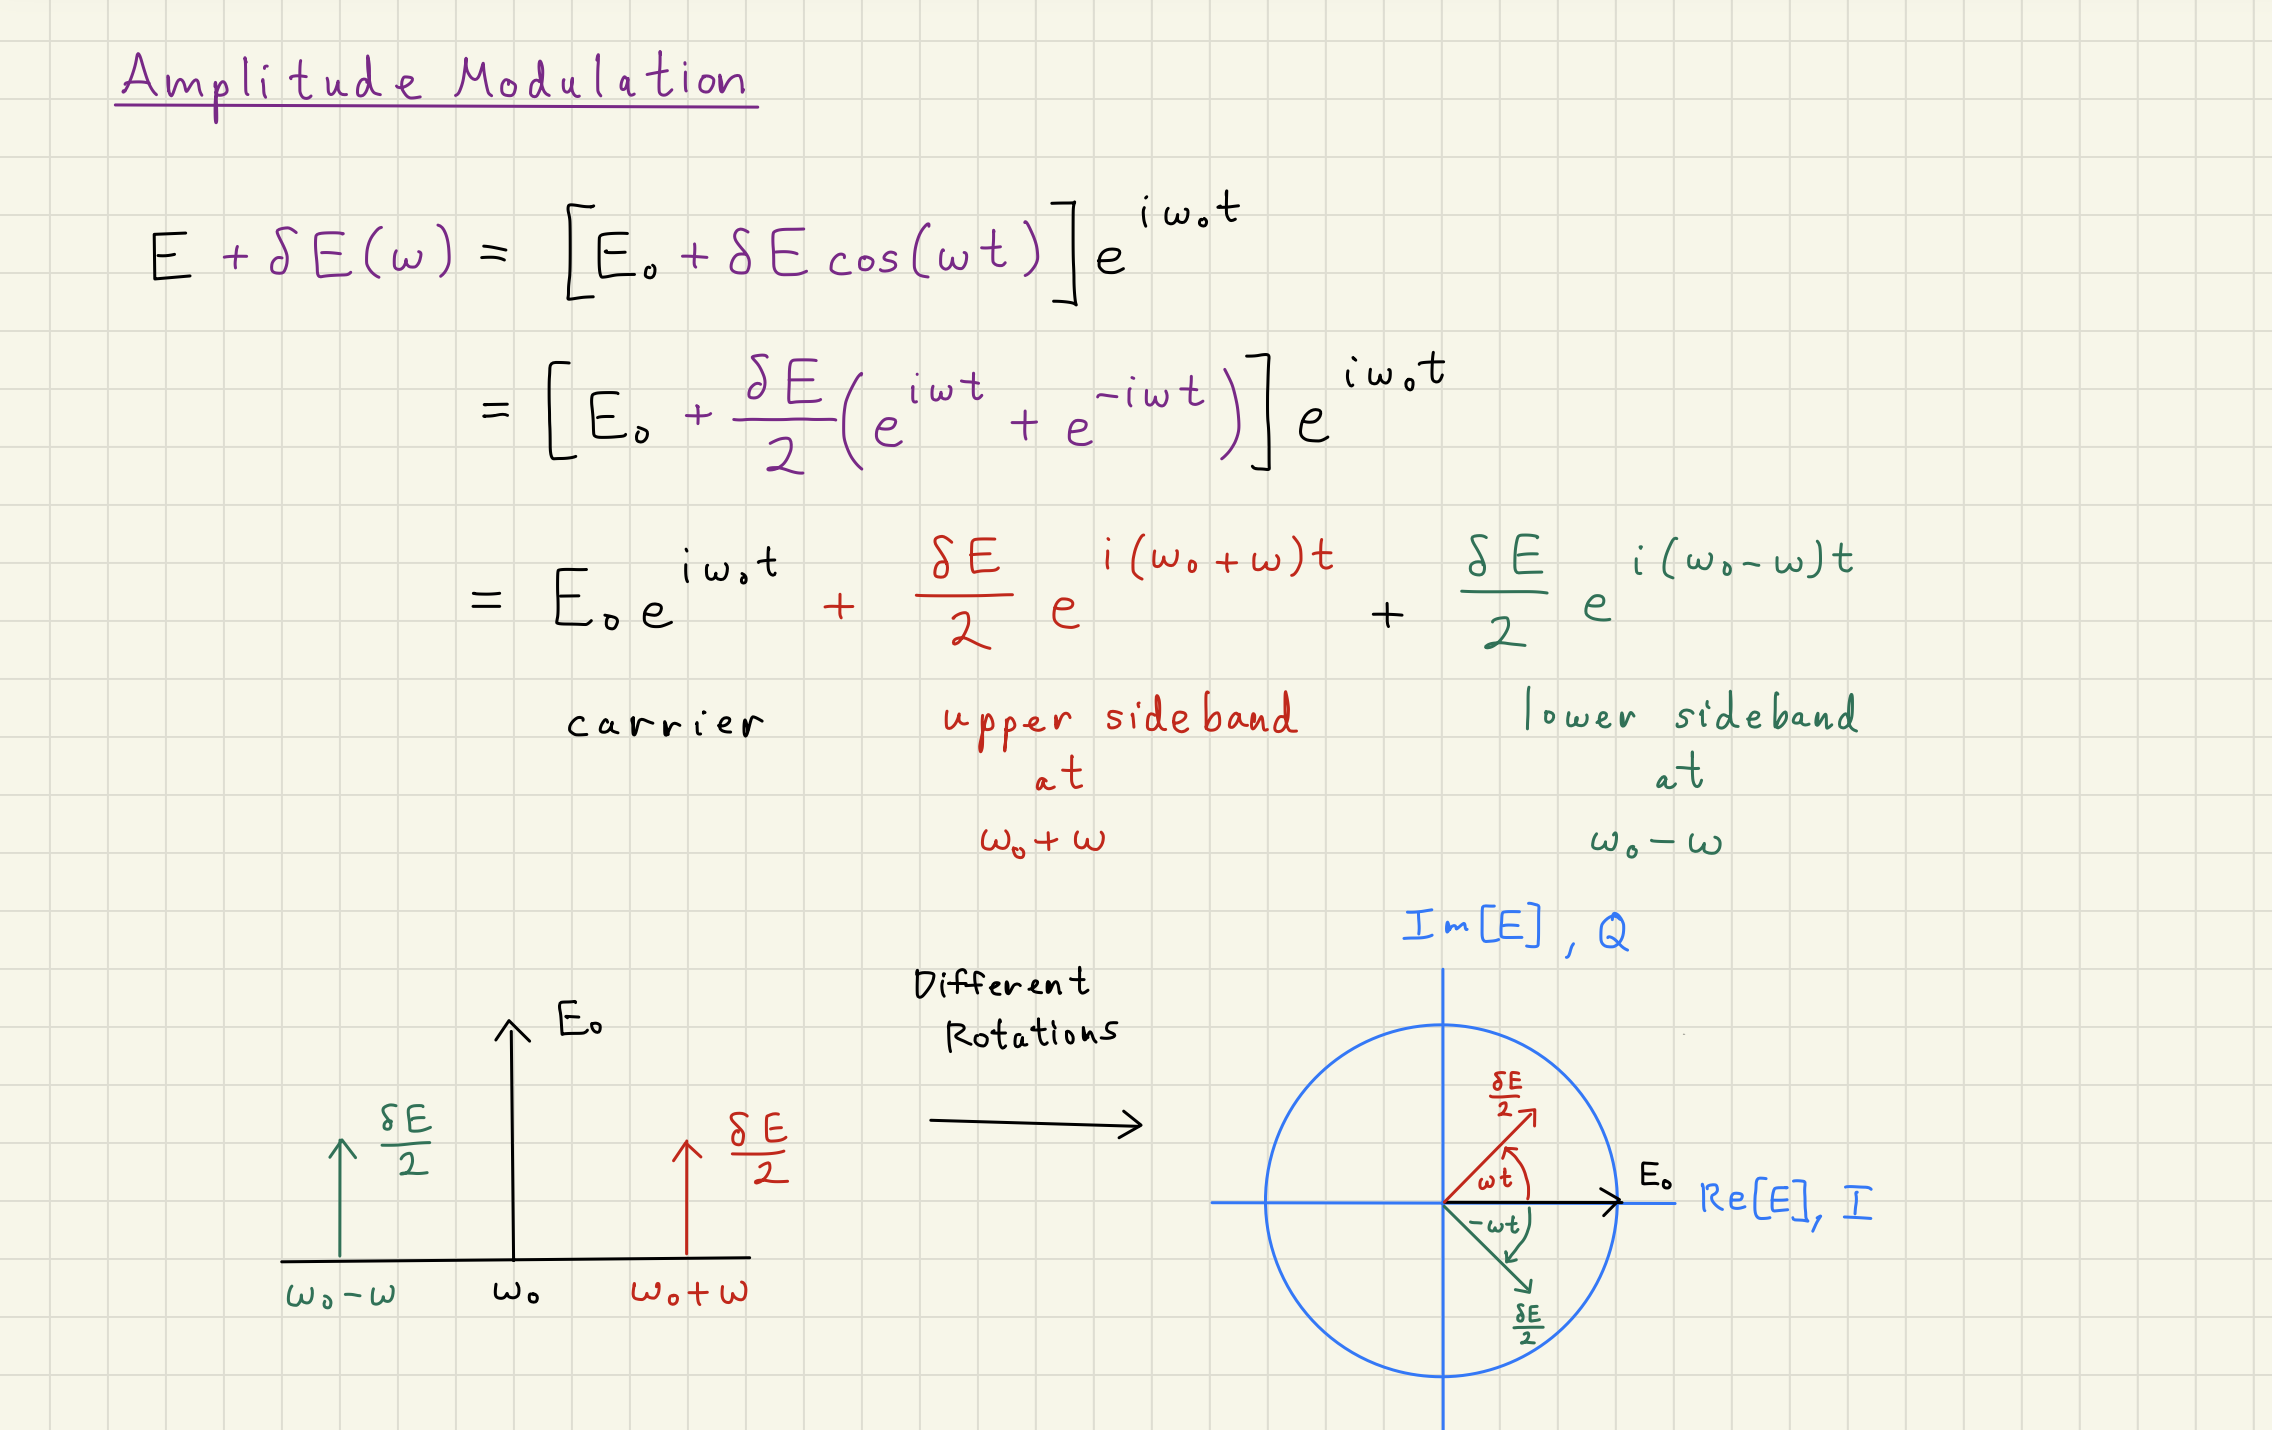

Amplitude Modulation Scheme

## Intensity noise
*Relative intensity noise* (RIN) is mathematically equivalent to amplitude modulation.
From Eq.[](#eq:amplitude_modulation_power), 
we can relate relative intensity noise to relative amplitude noise (RAN).
Dividing Eq.[](#eq:amplitude_modulation_power) by $P_0$, we define the relative intensity noise in terms of amplitude modulation:
\begin{align}
    \label{eq:rin_to_ran}
    \dfrac{\delta P}{P_0} &= \dfrac{2 \delta E}{E_0}
\end{align}

Going back to the expression for amplitude modulation $E_{\delta E}$ Eq.[](#eq:amplitude_modulation),
we can express the electric field $E_{\delta P}$ and power $P_{\delta E}$ in terms of relative intensity noise $\delta P / P$:
\begin{align}
    \label{eq:intensity_modulation}
    E_{\delta P} &= E_0 e^{i \omega_0 t} \left( 1 + \dfrac{\delta P}{4 P_0} e^{i \omega t} + \dfrac{\delta P}{4 P_0} e^{-i \omega t} \right)\\
    \label{eq:intensity_modulation_power}
    P_{\delta E} &= P_0 \left(1 + \dfrac{\delta P}{P_0} \cos(\omega t) \right)
\end{align}

In [2]:
def carrier(phi, mod_depth):
    return (1 - mod_depth**2 / 4) * np.exp(1j * phi)

def upper_phase_sideband(phi, theta, mod_depth):
    return 1j * mod_depth / 2 * np.exp(1j * (theta + phi))
    
def lower_phase_sideband(phi, theta, mod_depth):
    return 1j * mod_depth / 2 * np.exp(-1j * (theta - phi))

def upper_amp_sideband(phi, theta, mod_depth):
    return mod_depth / 2 * np.exp(1j * (theta + phi))
    
def lower_amp_sideband(phi, theta, mod_depth):
    return mod_depth / 2 * np.exp(-1j * (theta - phi))

interactive(children=(FloatSlider(value=0.0, description='$\\phi_0$ [deg]:', max=180.0, readout_format='.3f'),…

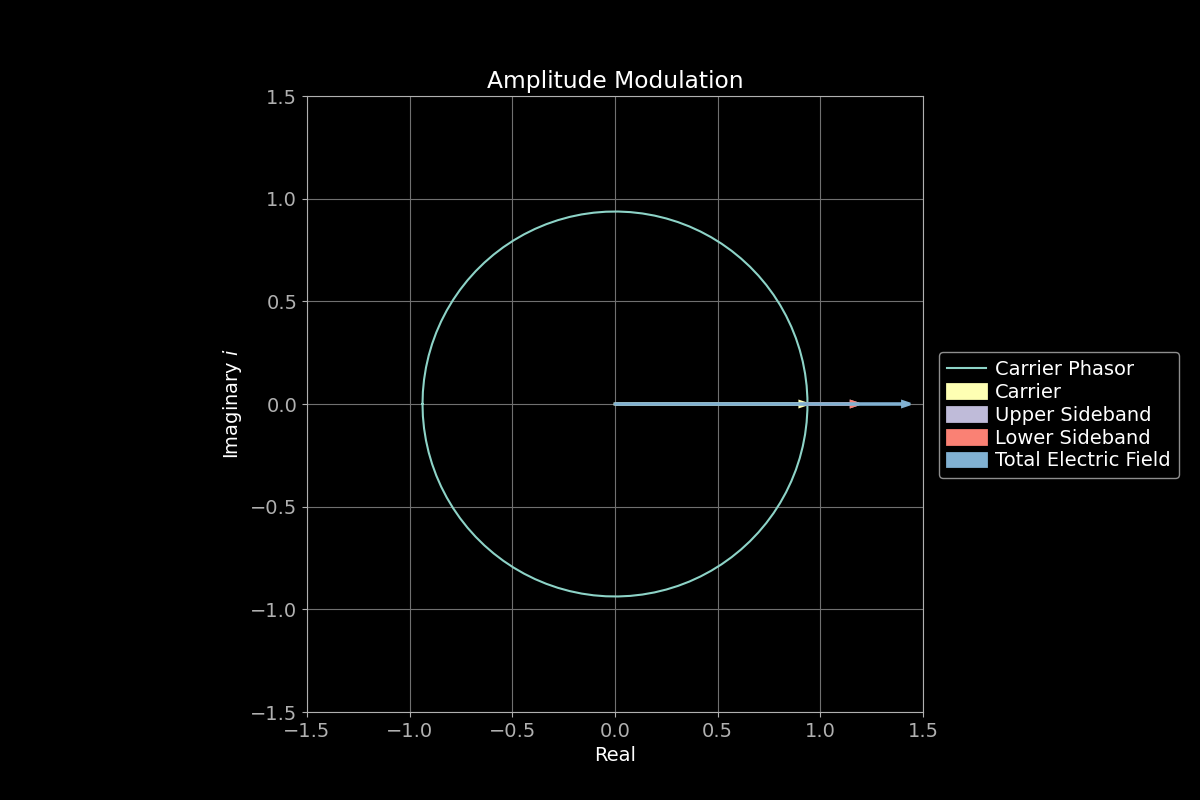

In [3]:
#| label: fig:interactive_amplitude_modulation
#| "tags": [ "hide-input",]
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot()

phis = np.linspace(-np.pi, np.pi, 100)

phi0 = 0
theta0 = 0
mod_depth = 0.5

# Arc
plot_carriers = carrier(phis, mod_depth)

plot_carriers_real = np.real(plot_carriers)
plot_carriers_imag = np.imag(plot_carriers)

# Vectors
plot_carrier = carrier(phi0, mod_depth)
plot_usb = upper_amp_sideband(phi0, theta0, mod_depth)
plot_lsb = lower_amp_sideband(phi0, theta0, mod_depth)
plot_total = plot_carrier + plot_usb + plot_lsb

plot_carrier_real = np.real(plot_carrier)
plot_carrier_imag = np.imag(plot_carrier)
plot_usb_real = np.real(plot_usb)
plot_usb_imag = np.imag(plot_usb)
plot_lsb_real = np.real(plot_lsb)
plot_lsb_imag = np.imag(plot_lsb)
plot_total_real = np.real(plot_total)
plot_total_imag = np.imag(plot_total)

arc1, = ax1.plot(plot_carriers_real, plot_carriers_imag, label="Carrier Phasor")
# line1, = ax1.plot([0, plot_carrier_real], [0, plot_carrier_imag], 'o-', label="Carrier")
# line2, = ax1.plot([0, plot_usb_real], [0, plot_usb_imag], 'o-', label="Upper Sideband")
# line3, = ax1.plot([0, plot_lsb_real], [0, plot_lsb_imag], 'o-', label="Lower Sideband")
# line4, = ax1.plot([0, plot_total_real], [0, plot_total_imag], 'o-', label="Total Electric Field")

arrow1 = ax1.arrow(0, 0, plot_carrier_real, plot_carrier_imag, shape='full', color="C1", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Carrier")
arrow2 = ax1.arrow(plot_carrier_real, plot_carrier_imag, plot_usb_real, plot_usb_imag, shape='full', color="C2", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Upper Sideband")
arrow3 = ax1.arrow(plot_carrier_real, plot_carrier_imag, plot_lsb_real, plot_lsb_imag, shape='full', color="C3", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Lower Sideband")
arrow4 = ax1.arrow(0, 0, plot_total_real, plot_total_imag, shape='full', color="C4", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Total Electric Field")

ax1.set_xlabel("Real")
ax1.set_ylabel("Imaginary $i$")
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.grid()

ax1.set_title("Amplitude Modulation")

ax1.legend(bbox_to_anchor=(1.01, 0.6))
ax1.set_aspect('equal')
# plt.tight_layout()

def update_amplitude_modulation(
    phi0_slider_value=phi0,
    theta0_slider_value=theta0,
    mod_depth_slider_value=mod_depth
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    new_phi0 = np.pi / 180 * phi0_slider_value
    new_theta0 = np.pi / 180 * theta0_slider_value
    new_mod_depth = mod_depth_slider_value
    
    # Arc
    new_plot_carriers = carrier(phis, new_mod_depth)
    
    new_plot_carriers_real = np.real(new_plot_carriers)
    new_plot_carriers_imag = np.imag(new_plot_carriers)
    
    # Vectors
    new_plot_carrier = carrier(new_phi0, new_mod_depth)
    new_plot_usb = upper_amp_sideband(new_phi0, new_theta0, new_mod_depth)
    new_plot_lsb = lower_amp_sideband(new_phi0, new_theta0, new_mod_depth)
    new_plot_total = new_plot_carrier + new_plot_usb + new_plot_lsb
    
    new_plot_carrier_real = np.real(new_plot_carrier)
    new_plot_carrier_imag = np.imag(new_plot_carrier)
    new_plot_usb_real = np.real(new_plot_usb)
    new_plot_usb_imag = np.imag(new_plot_usb)
    new_plot_lsb_real = np.real(new_plot_lsb)
    new_plot_lsb_imag = np.imag(new_plot_lsb)
    new_plot_total_real = np.real(new_plot_total)
    new_plot_total_imag = np.imag(new_plot_total)

    # line1.set_xdata(new_xx0)
    # line1.set_ydata(new_yy0)
    arc1.set_xdata(new_plot_carriers_real)
    arc1.set_ydata(new_plot_carriers_imag)
    arrow1.set_data(x=0, y=0, dx=new_plot_carrier_real, dy=new_plot_carrier_imag)
    arrow2.set_data(x=new_plot_carrier_real, y=new_plot_carrier_imag, dx=new_plot_usb_real, dy=new_plot_usb_imag)
    arrow3.set_data(x=new_plot_carrier_real, y=new_plot_carrier_imag, dx=new_plot_lsb_real, dy=new_plot_lsb_imag)
    arrow4.set_data(x=0, y=0, dx=new_plot_total_real, dy=new_plot_total_imag)

    # ax1.set_title(r"$(r, \theta)$ = " + f"({new_plot_rr0:.3f}, {180/np.pi*new_plot_theta0:.3f}"+r"$^\circ$)")
    
    fig1.canvas.draw_idle()
    return

# Create interactive widget
phi0_slider1 = FloatSlider(
    value=phi0,
    min=0,
    max=180,
    step=0.1,
    description=r"$\phi_0$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
theta0_slider1 = FloatSlider(
    value=theta0,
    min=0,
    max=360,
    step=0.1,
    description=r"$\omega t$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
mod_depth_slider1 = FloatSlider(
    value=mod_depth,
    min=0,
    max=1,
    step=0.01,
    description=r"$\Gamma$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_amplitude_modulation,
    phi0_slider_value=phi0_slider1,
    theta0_slider_value=theta0_slider1,
    mod_depth_slider_value=mod_depth_slider1,
)
plt.show()

interactive(children=(FloatSlider(value=0.0, description='$\\phi_0$ [deg]:', max=180.0, readout_format='.3f'),…

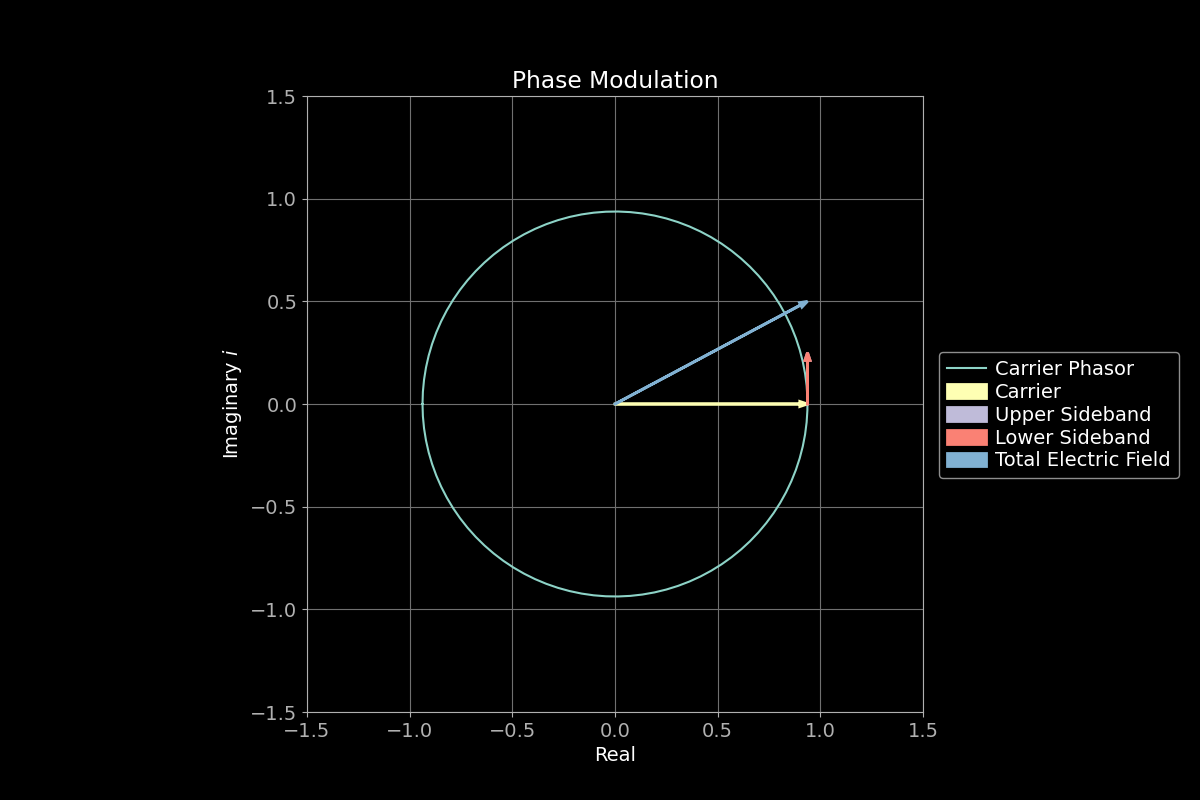

In [4]:
#| label: fig:interactive_phase_modulation
#| "tags": [ "hide-input",]
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot()

phis = np.linspace(-np.pi, np.pi, 100)

phi0 = 0
theta0 = 0
mod_depth = 0.5

# Arc
plot_carriers = carrier(phis, mod_depth)

plot_carriers_real = np.real(plot_carriers)
plot_carriers_imag = np.imag(plot_carriers)

# Vectors
plot_carrier = carrier(phi0, mod_depth)
plot_usb = upper_phase_sideband(phi0, theta0, mod_depth)
plot_lsb = lower_phase_sideband(phi0, theta0, mod_depth)
plot_total = plot_carrier + plot_usb + plot_lsb

plot_carrier_real = np.real(plot_carrier)
plot_carrier_imag = np.imag(plot_carrier)
plot_usb_real = np.real(plot_usb)
plot_usb_imag = np.imag(plot_usb)
plot_lsb_real = np.real(plot_lsb)
plot_lsb_imag = np.imag(plot_lsb)
plot_total_real = np.real(plot_total)
plot_total_imag = np.imag(plot_total)

arc12, = ax2.plot(plot_carriers_real, plot_carriers_imag, label="Carrier Phasor")
# line1, = ax2.plot([0, plot_carrier_real], [0, plot_carrier_imag], 'o-', label="Carrier")
# line2, = ax2.plot([0, plot_usb_real], [0, plot_usb_imag], 'o-', label="Upper Sideband")
# line3, = ax2.plot([0, plot_lsb_real], [0, plot_lsb_imag], 'o-', label="Lower Sideband")
# line4, = ax2.plot([0, plot_total_real], [0, plot_total_imag], 'o-', label="Total Electric Field")

arrow12 = ax2.arrow(0, 0, plot_carrier_real, plot_carrier_imag, shape='full', color="C1", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Carrier")
arrow22 = ax2.arrow(plot_carrier_real, plot_carrier_imag, plot_usb_real, plot_usb_imag, shape='full', color="C2", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Upper Sideband")
arrow32 = ax2.arrow(plot_carrier_real, plot_carrier_imag, plot_lsb_real, plot_lsb_imag, shape='full', color="C3", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Lower Sideband")
arrow42 = ax2.arrow(0, 0, plot_total_real, plot_total_imag, shape='full', color="C4", lw=2, 
                  length_includes_head=True, head_width=.025, zorder=2, label="Total Electric Field")

ax2.set_xlabel("Real")
ax2.set_ylabel("Imaginary $i$")
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([-1.5, 1.5])
ax2.grid()

ax2.set_title("Phase Modulation")

ax2.legend(bbox_to_anchor=(1.01, 0.6))
ax2.set_aspect('equal')
# plt.tight_layout()

def update_phase_modulation(
    phi0_slider_value=phi0,
    theta0_slider_value=theta0,
    mod_depth_slider_value=mod_depth
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    new_phi0 = np.pi / 180 * phi0_slider_value
    new_theta0 = np.pi / 180 * theta0_slider_value
    new_mod_depth = mod_depth_slider_value
    
    # Arc
    new_plot_carriers = carrier(phis, new_mod_depth)
    
    new_plot_carriers_real = np.real(new_plot_carriers)
    new_plot_carriers_imag = np.imag(new_plot_carriers)
    
    # Vectors
    new_plot_carrier = carrier(new_phi0, new_mod_depth)
    new_plot_usb = upper_phase_sideband(new_phi0, new_theta0, new_mod_depth)
    new_plot_lsb = lower_phase_sideband(new_phi0, new_theta0, new_mod_depth)
    new_plot_total = new_plot_carrier + new_plot_usb + new_plot_lsb
    
    new_plot_carrier_real = np.real(new_plot_carrier)
    new_plot_carrier_imag = np.imag(new_plot_carrier)
    new_plot_usb_real = np.real(new_plot_usb)
    new_plot_usb_imag = np.imag(new_plot_usb)
    new_plot_lsb_real = np.real(new_plot_lsb)
    new_plot_lsb_imag = np.imag(new_plot_lsb)
    new_plot_total_real = np.real(new_plot_total)
    new_plot_total_imag = np.imag(new_plot_total)

    # line1.set_xdata(new_xx0)
    # line1.set_ydata(new_yy0)
    arc12.set_xdata(new_plot_carriers_real)
    arc12.set_ydata(new_plot_carriers_imag)
    arrow12.set_data(x=0, y=0, dx=new_plot_carrier_real, dy=new_plot_carrier_imag)
    arrow22.set_data(x=new_plot_carrier_real, y=new_plot_carrier_imag, dx=new_plot_usb_real, dy=new_plot_usb_imag)
    arrow32.set_data(x=new_plot_carrier_real, y=new_plot_carrier_imag, dx=new_plot_lsb_real, dy=new_plot_lsb_imag)
    arrow42.set_data(x=0, y=0, dx=new_plot_total_real, dy=new_plot_total_imag)

    # ax2.set_title(r"$(r, \theta)$ = " + f"({new_plot_rr0:.3f}, {180/np.pi*new_plot_theta0:.3f}"+r"$^\circ$)")
    
    fig2.canvas.draw_idle()
    return

# Create interactive widget
phi0_slider2 = FloatSlider(
    value=phi0,
    min=0,
    max=180,
    step=0.1,
    description=r"$\phi_0$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
theta0_slider2 = FloatSlider(
    value=theta0,
    min=0,
    max=360,
    step=0.1,
    description=r"$\omega t$ [deg]:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
mod_depth_slider2 = FloatSlider(
    value=mod_depth,
    min=0,
    max=1,
    step=0.01,
    description=r"$\Gamma$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_phase_modulation,
    phi0_slider_value=phi0_slider2,
    theta0_slider_value=theta0_slider2,
    mod_depth_slider_value=mod_depth_slider2,
)
plt.show()

## Modulation of a reflection off a mirror

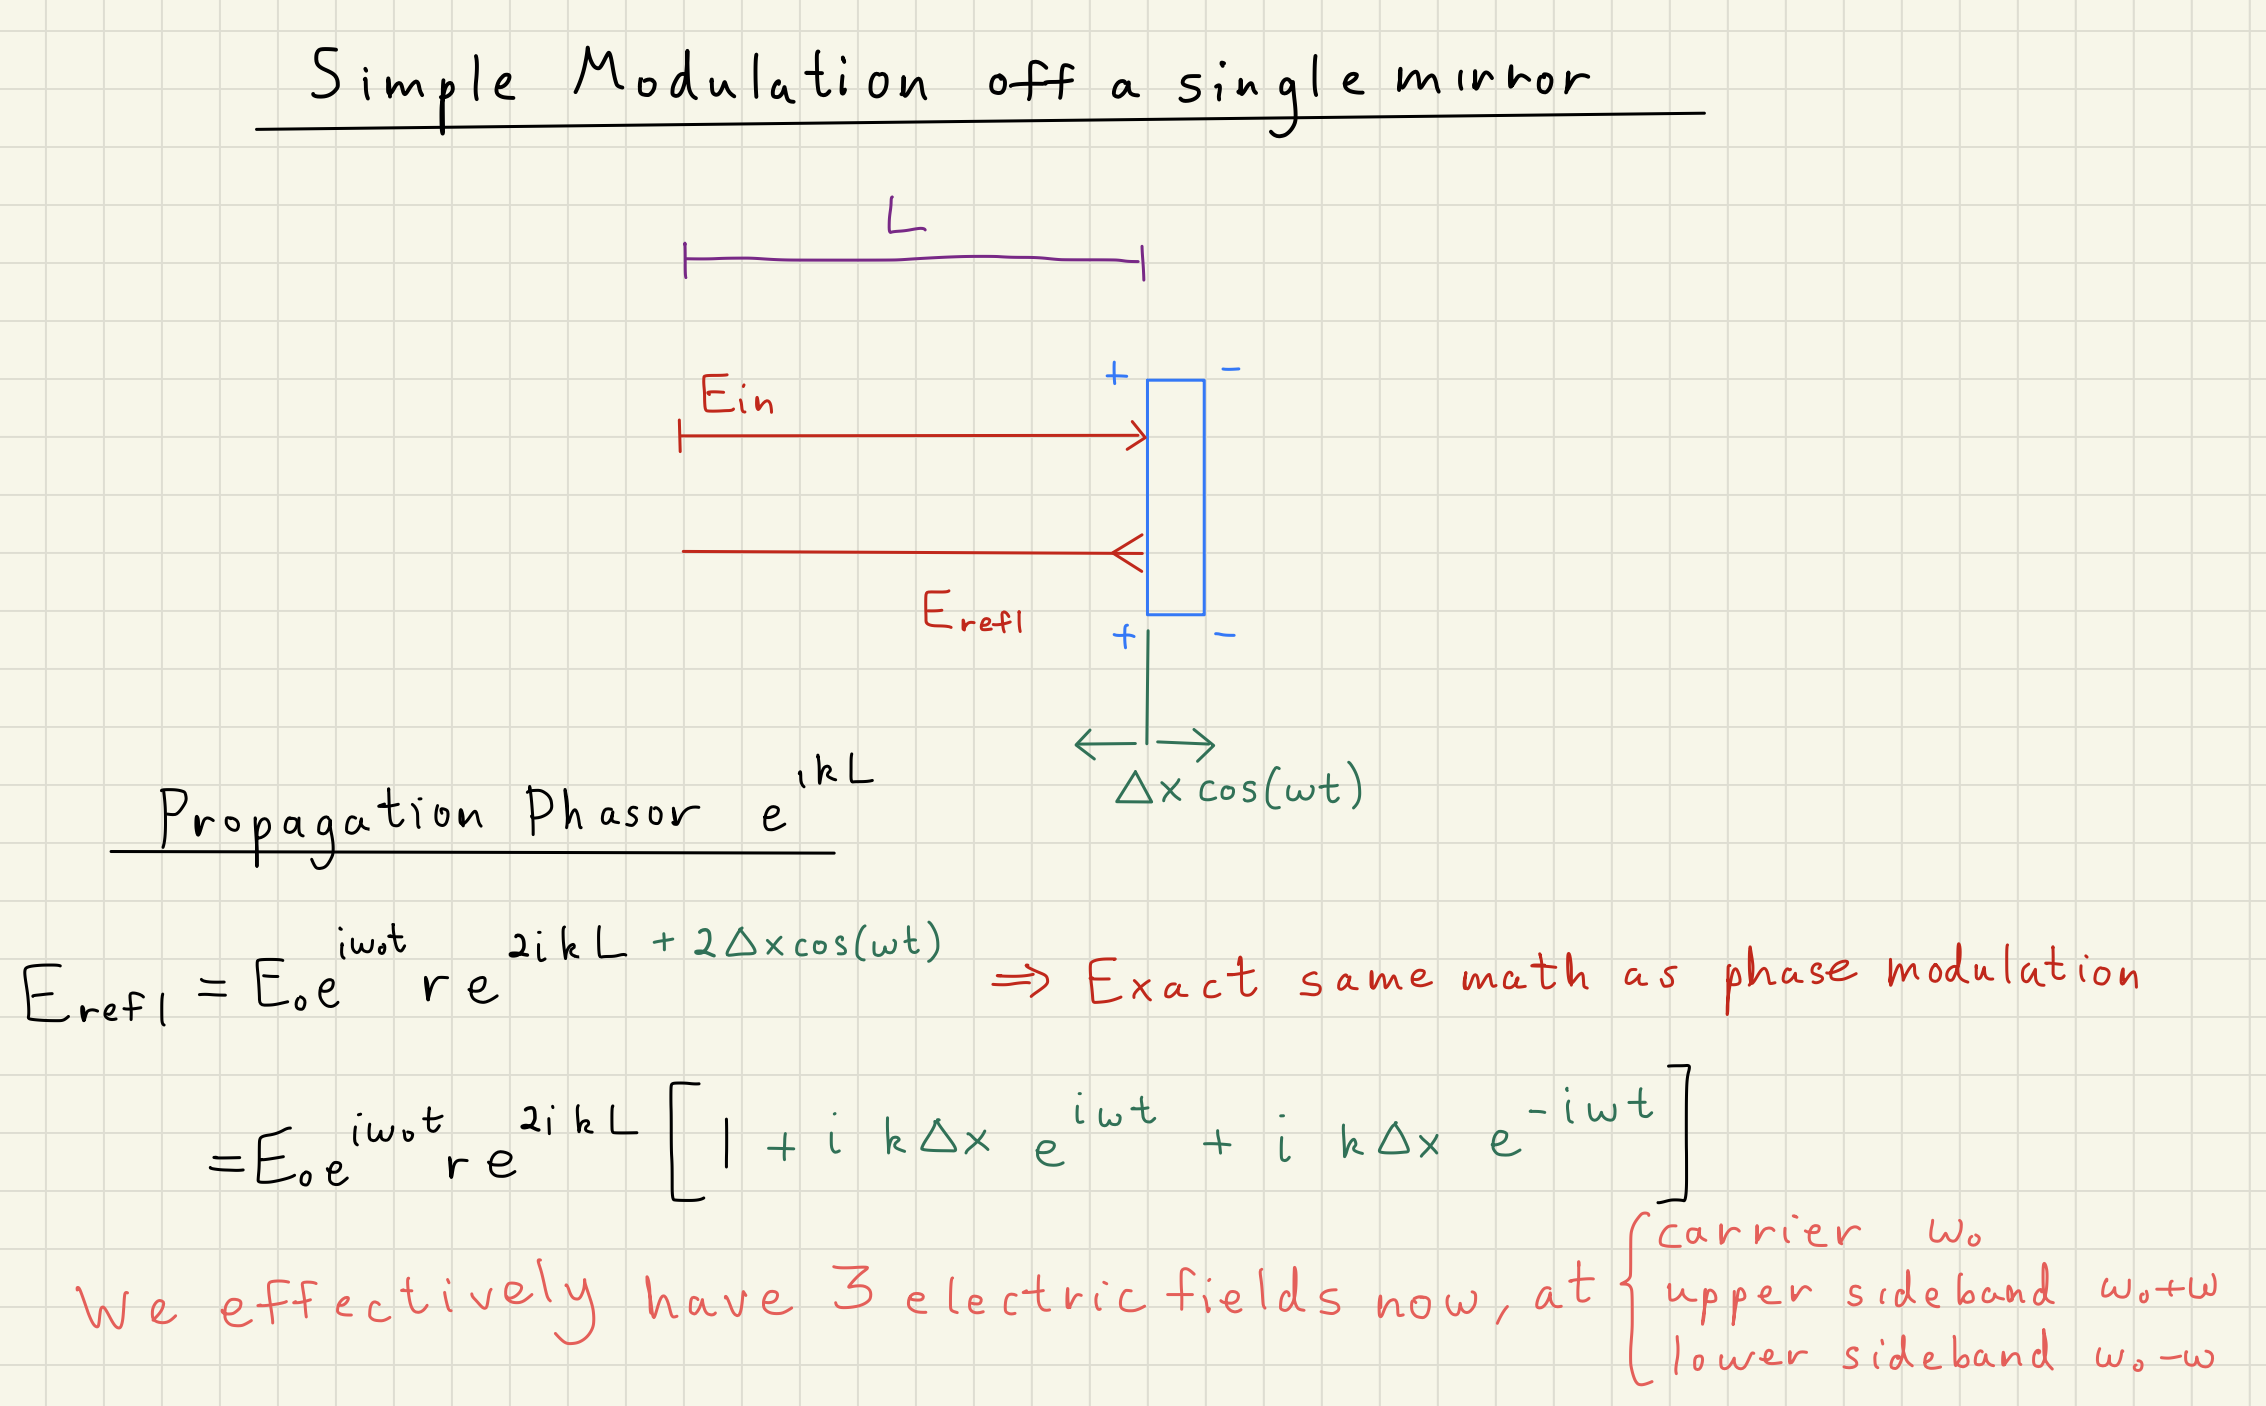

Mirror Reflection Phase Modulation

## Review of Modulations
The key to all of the modulations above are the creation of the additional phasors at $\omega_0 + \omega$ and $\omega_0 - \omega$.\
These represent **entirely different frequencies of light**.

Typically, $\omega_0$ is the carrier frequency, which is a huge number, on the 100 terrahertz scale.\
$\omega$ is either in the *audio* band of 10 - 10000 Hz or *radio-frequency* band of a few megahertz.
So, the frequencies are fairly close in absolute terms (100 THz $\pm$ 10 MHz is a fairly small difference.)
This helps us understand how the light carrier and sidebands interact with optical elements in a similar way.

Modulations can be created by specific interactions of the laser carrier with optical elements, including power or frequency fluctuations from the laser, thermal fluctuations of the mirror surface, "popsical" modes of mirror mounts, or seismic motion of a suspended mirror.\
Anything that interacts with the laser imposes some modulations upon it, but these can be measured and controlled.

# Demodulations
Above, we've been calculating the effects of modulations on electric fields and power quantities for phase and amplitude modulations.
Now, some of the information 